In [1]:
#set WD
import os
os.getcwd()
os.chdir('C:\\Users\\AT003502\\Documents\Phishing project')

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import re
%matplotlib notebook
from urllib.parse import urlparse

In [3]:
#Data preprocessing

In [4]:
DATA_PATH = 'URL.csv'
#DATA_PATH='verified_online.csv'
dataframe = pd.read_csv(DATA_PATH, index_col=0)

In [5]:
dataframe.sample(n=5)
dataframe.head()

,url,list
Index,,
1,http://google.com,0
2,http://facebook.com,0
3,http://youtube.com,0
4,http://yahoo.com,0
5,http://baidu.com,0


In [6]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'LENGTH'] = len(row['url'])

In [7]:
dataframe.sample(n=5)

,url,list,LENGTH
Index,,,
532,http://justdial.com,0,19.0
279,http://55bbs.com,0,16.0
136,http://cookieskeywest.com/modules/8218395246/1...,1,71.0
364,http://xinhuanet.com,0,20.0
300,http://56.com,0,13.0


Text(0,0.5,'Label')

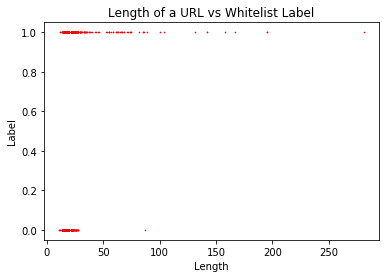

In [8]:
plt.plot(dataframe.LENGTH.values,  dataframe.list.values, 'r*', markersize='1')
plt.title('Length of a URL vs Whitelist Label')
plt.xlabel('Length')
plt.ylabel('Label')

### Feature Exraction for URLs

In [9]:
#suffix ends in RU
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'RU'] = 1.0 if '.ru' in row['url'] else 0.0

In [10]:
#suffix ends in .com
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Com'] = 1.0 if '.com' in row['url'] else 0.0

In [11]:
#suffix ends in .org
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Org'] = 1.0 if '.org' in row['url'] else 0.0

In [12]:
#suffix ends in .co
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Co'] = 1.0 if '.co.' in row['url'] else 0.0

In [13]:
#IP address in the url
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'IP_add'] = 1.0 if re.search( r'[0-9]+(?:\.[0-9]+){3}',(row['url'])) else 0.0

In [14]:
# Check for @ symbol
for row_idx, row in dataframe.iterrows():
    dataframe.loc['has_at_symbol'] = dataframe.loc['@'] = 1.0 if '@' in dataframe['url'] else 0.0

In [15]:
# Prefix Suffix (i.e. has - in domain name)
for row_idx, row in dataframe.iterrows():
    dataframe.loc['pref_suf'] = dataframe.loc['-'] = 1.0 if '-' in dataframe['url'] else 0.0

In [16]:
# Count number of dots
for row_idx, row in dataframe.iterrows():
    dataframe.loc['no_dots'] = dataframe.url.str.count("\.")

In [ ]:
#    list_pathlist.append(parsed)
import urllib
    
#list_pathlist
resp_code=[]
for url in dataframe.url:
    try:
        r = urllib.request.urlopen(url)
        resp_code.append (r.code)
    except urllib.error.URLError as e:
        resp_code.append ("URLerror")
    except urllib.error.HTTPError as e:
        resp_code.append("HTTPerror")
    except:
        resp_code.append("Unknown error")
        
#header with requests

##### For shortened urls  - work required on this

In [11]:
quotes="'"
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'sock_test'] =  (quotes + (row['url']) + quotes)

In [23]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, '_http_remv'] = (row['url']).replace ("http://","")

In [64]:
#doesn't work
import socket
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'HOST_NAME'] = (socket.gethostbyname(row['_http_remv']))

        ###Doesn't work with http:// -this needs to be removed.

gaierror: [Errno 11001] getaddrinfo failed

## Model test/ train

In [1]:
dataframe.head(10)
#fuzzyhash

NameError: name 'dataframe' is not defined

In [47]:
data = dataframe[['LENGTH', 'Com','RU','Co','ip_add','has_at_symbol','pref_suf','no_dots']].values
labels = dataframe[['list']].values
labels = labels.reshape(len(labels),)

KeyError: "['LENGTH' 'ip_add'] not in index"

In [121]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.25)

In [122]:
classifier = LogisticRegression(penalty='l2', C=2.0)

In [123]:
classifier.fit(data_train, labels_train)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
sklearn.metrics.accuracy_score(classifier.predict(data_test), labels_test)

0.7395348837209302